## Importing libraries

In [8]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
%matplotlib notebook
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

nb_epoch = 12

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

## Experiment 1 
### 2D Conv 3x3 Kernel o/p 32 + 2D Conv 3x3 Kernel o/p 64 + Max Pooling Kernel 2x2 + Drop out 0.25 + Flatten + Drop out 0.5

In [3]:
%%time
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
 
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 80s 1ms/step - loss: 0.2628 - accuracy: 0.9208 - val_loss: 0.0556 - val_accuracy: 0.9823
Epoch 2/12
60000/60000 [==============================] - 80s 1ms/step - loss: 0.0879 - accuracy: 0.9738 - val_loss: 0.0435 - val_accuracy: 0.9856
Epoch 3/12
60000/60000 [==============================] - 79s 1ms/step - loss: 0.0649 - accuracy: 0.9814 - val_loss: 0.0369 - val_accuracy: 0.9881
Epoch 4/12
60000/60000 [==============================] - 80s 1ms/step - loss: 0.0533 - accuracy: 0.9840 - val_loss: 0.0324 - val_accuracy: 0.9892
Epoch 5/12
60000/60000 [==============================] - 79s 1ms/step - loss: 0.0464 - accuracy: 0.9859 - val_loss: 0.0314 - val_accuracy: 0.9892
Epoch 6/12
60000/60000 [==============================] - 79s 1ms/step - loss: 0.0406 - accuracy: 0.9870 - val_loss: 0.0330 - val_accuracy: 0.9894
Epoch 7/12
60000/60000 [==============================] - 79s 1ms/st

Test loss: 0.024504883934681858
Test accuracy: 0.9919000267982483


<IPython.core.display.Javascript object>


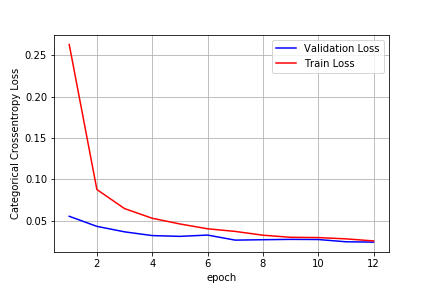

<IPython.core.display.Javascript object>


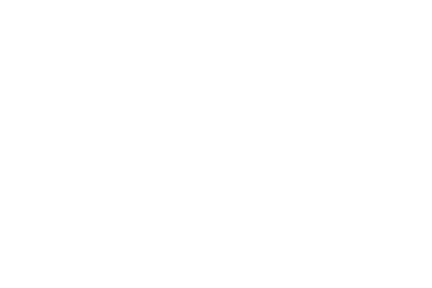

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## Experiment 2 
### 2D Conv 5x5 Kernel o/p 32 + 2D Conv 5x5 Kernel o/p 64 + Max Pooling Kernel 2x2 + Droup out 0.25 + Flatten + Drop out 0.5

In [ ]:
%%time
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## Experiment 3
### 2D Conv 7x7 Kernel o/p 32 + 2D Conv 7x7 Kernel o/p 64 + Max Pooling Kernel 2x2 + Droup out 0.25 + Flatten + Drop out 0.5

In [ ]:
%%time
model = Sequential()
model.add(Conv2D(32, kernel_size=(7, 7),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (7, 7), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## Experiment 4
### 2D Conv 3x3 Kernel o/p 32 + 2D Conv 3x3 Kernel o/p 64 + Max Pooling Kernel 3x3 + Droup out 0.25 + Flatten + Drop out 0.5

In [ ]:
%%time
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## Experiment 5
### 2D Conv 3x3 Kernel o/p 32 + 2D Conv 3x3 Kernel o/p 64 + Max Pooling Kernel 5x5 + Droup out 0.25 + Flatten + Drop out 0.5

In [ ]:
%%time
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(5, 5)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## Experiment 5
### 2D Conv 3x3 Kernel o/p 32 + 2D Conv 3x3 Kernel o/p 64 + Max Pooling Kernel 2x2 + Droup out 0.4 + Flatten + Drop out 0.5

In [ ]:
%%time
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## Experiment 6
### 2D Conv 3x3 Kernel o/p 32 + 2D Conv 3x3 Kernel o/p 64 + Max Pooling Kernel 2x2 + Droup out 0.5 + Flatten + Drop out 0.5

In [ ]:
%%time
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## Experiment 7
### 2D Conv 3x3 Kernel o/p 32 + 2D Conv 3x3 Kernel o/p 64 + Max Pooling Kernel 2x2 + Droup out 0.6 + Flatten + Drop out 0.5

In [ ]:
%%time
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.6))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## Experiment 8
### 2D Conv 3x3 Kernel o/p 20 + 2D Conv 3x3 Kernel o/p 40 + Max Pooling Kernel 2x2 + Droup out 0.25 + Flatten + Drop out 0.5

In [ ]:
%%time
model = Sequential()
model.add(Conv2D(20, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(40, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## Experiment 9
### 2D Conv 3x3 Kernel o/p 40 + 2D Conv 3x3 Kernel o/p 20 + Max Pooling Kernel 2x2 + Droup out 0.25 + Flatten + Drop out 0.5

In [ ]:
%%time
model = Sequential()
model.add(Conv2D(40, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(20, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## Conclusion

In [ ]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model description",  "test loss", "test accuracy"]
x.add_row(["Conv 2D 3x3 32\n Conv 2D 3x3 64\n Maxpool 2x2 \n Dropout 0.25 \n Flatten \n Dense Dropout 0.5", 0.0302, .9904])
x.add_row(["Conv 2D 5x5 32\n Conv 2D 5x5 64\n Maxpool 2x2 \n Dropout 0.25 \n Flatten \n Dense Dropout 0.5", 0.0231, .9926])
x.add_row(["Conv 2D 7x7 32\n Conv 2D 7x7 64\n Maxpool 2x2 \n Dropout 0.25 \n Flatten \n Dense Dropout 0.5", 0.0227, .9937])
x.add_row(["Conv 2D 3x3 32\n Conv 2D 3x3 64\n Maxpool 3x3 \n Dropout 0.25 \n Flatten \n Dense Dropout 0.5", 0.0275, .9924])
x.add_row(["Conv 2D 3x3 32\n Conv 2D 3x3 64\n Maxpool 5x5 \n Dropout 0.25 \n Flatten \n Dense Dropout 0.5", 0.0284, .9925])
x.add_row(["Conv 2D 3x3 32\n Conv 2D 3x3 64\n Maxpool 2x2 \n Dropout 0.40 \n Flatten \n Dense Dropout 0.5", 0.0294, .9908])
x.add_row(["Conv 2D 3x3 32\n Conv 2D 3x3 64\n Maxpool 2x2 \n Dropout 0.50 \n Flatten \n Dense Dropout 0.5", 0.0305, .9908])
x.add_row(["Conv 2D 3x3 32\n Conv 2D 3x3 64\n Maxpool 2x2 \n Dropout 0.60 \n Flatten \n Dense Dropout 0.5", 0.0285, .9904])
x.add_row(["Conv 2D 3x3 20\n Conv 2D 3x3 40\n Maxpool 2x2 \n Dropout 0.60 \n Flatten \n Dense Dropout 0.5", 0.0285, .9904])
x.add_row(["Conv 2D 3x3 40\n Conv 2D 3x3 20\n Maxpool 2x2 \n Dropout 0.60 \n Flatten \n Dense Dropout 0.5", 0.0285, .9904])

print(x)